<a href="https://colab.research.google.com/github/keller3games/test/blob/main/BilddateienZuArrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bilddateien in passende Numpy Arrays umwandeln

Bilder liegen in der Regel in Form von Formaten wie jpg, png oder tiff vor. Für das maschinelle Lernen benötigen wir allerdings NumPy Arrays. Dieses Beispiel zeigt, wie ihr ein Bild aus einer Datei ladet und in ein korrekt formatiertes NumPy Array umwandelt.

## Bilddatei bereitstellen
Zunächst benötigen wir eine Beispieldatei. Nach der Ausführung der nächsten Zelle befindet sich eine Bilddatei `computer.jpg` im Dateibereich dieses Notebooks:

In [ ]:
import urllib.request

link = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Science_museum_025_adjusted.jpg/800px-Science_museum_025_adjusted.jpg"

urllib.request.urlretrieve(link, "computer.jpg");

## Datei laden und in Numpy Array umwandeln
Es gibt viele mögliche Lösungen für diese Aufgabe. Uns gefällt die folgende Lösung unter Verwendung des Moduls `PIL` (= Python Imaging Library) am besten:


In [ ]:
from PIL import Image
import numpy as np

img = Image.open("computer.jpg")

img_as_array = np.array(img)

`shape` liefert die Abmessungen des Arrays. Achtet darauf: die **erste Dimension** beschreibt die **Höhe**, die **zweite Dimension** die **Breite** des Bildes in Pixeln – die gewohnte Reihenfolge bei der Angabe von Bildabmessungen ist also vertauscht. Die dritte Dimension speichert die drei Farbkanäle:



In [ ]:
img_as_array.shape

(600, 800, 3)

## Datentyp und Wertebereich anpassen

Der Datentyp ist `uint8`, also vorzeichenlose 8 Bit Ganzzahlen. D.h. der Wertebereich jedes Farbkanals (rot, grün und blau) läuft von 0-255:

In [ ]:
print("type:", img_as_array.dtype)
print("minimum:", np.amin(img_as_array))
print("maximum:", np.amax(img_as_array))

type: uint8
minimum: 0
maximum: 255


Für's maschinelle Lernen benötigen wir in aller Regel allerdings Arrays vom Typ `float32` (= 32 Bit Fließkommazahlen) mit einem Wertebereich zwischen 0 und 1.

Die Umwandlung erledigt der folgende Code:

In [ ]:
img_as_array_float = (img_as_array / 255.0).astype("float32")
print("type:", img_as_array_float.dtype)
print("minimum:", np.amin(img_as_array_float))
print("maximum:", np.amax(img_as_array_float))

type: float32
minimum: 0.0
maximum: 1.0


Der Vollständigkeit halber zeigen wir hier noch, wie wir das ins NumPy Array geladene Bild darstellen:

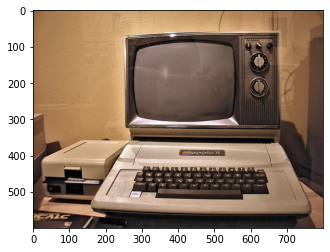

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(img_as_array_float)